<ipython-input-2-540e1369fe88>:37: DtypeWarning: Columns (0,1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  current_voltage_readings = pd.read_csv("Charlie-DataLog-9-24.csv", skiprows=13, usecols=['Time', 'D1 DC Bus Voltage', 'D4 DC Bus Current'],)


Mean Wattage for run 1 : 6209.43 W | Length of run: 0:00:54
Mean Wattage for run 2 : 8082.68 W | Length of run: 0:02:57
Mean Wattage for run 3 : 5854.03 W | Length of run: 0:04:09
Mean Wattage for run 4 : 8744.87 W | Length of run: 0:04:44


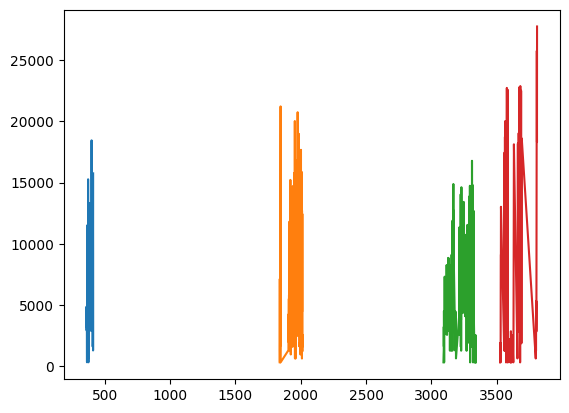

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def separate_Into_Runs(data_frame, time_between_runs):
    run_count = 0
    prev_run_index = 0

    for i in range (0, len(data_frame) - 1):

        # If the difference in time between two adjacent rows is greater than "time_between_runs" a new run will be started.
        # Or if the loop has reached the last row of the data
        if data_frame["Time"].iat[i + 1] - data_frame["Time"].iat[i] > time_between_runs or i == len(data_frame) - 2:
            run_count += 1

            separated_run = data_frame.head(i)
            separated_run = separated_run.tail(i - prev_run_index - 1)

            seconds = int(data_frame["Time"].iat[i] - data_frame["Time"].iat[prev_run_index + 1])
            prev_run_index = i

            wattage = round(separated_run['Wattage'].mean(), 2)

            print("Mean Wattage for run", run_count ,":", wattage, "W | Length of run:" ,convert(seconds) )

            filename = f'run_{run_count}.csv'
            separated_run.to_csv(filename)

            plt.plot(separated_run["Time"], separated_run["Wattage"])

def convert(seconds):
    min, sec = divmod(seconds, 60)
    hour, min = divmod(min, 60)
    return '%d:%02d:%02d' % (hour, min, sec)


# Read the CSV data and gets rid of row with units
current_voltage_readings = pd.read_csv("Charlie-DataLog-9-24.csv", skiprows=13, usecols=['Time', 'D1 DC Bus Voltage', 'D4 DC Bus Current'],)
current_voltage_readings = current_voltage_readings.drop(0)

# Turns all values in the dataframe into floats
for col in current_voltage_readings.columns:
    current_voltage_readings[col] = current_voltage_readings[col].astype(float)

current_voltage_readings = current_voltage_readings[current_voltage_readings['Time'] % 0.5 == 0]

# Creating Wattage column and removing all rows that have current < 1
current_voltage_readings['Wattage'] = current_voltage_readings['D1 DC Bus Voltage'] * current_voltage_readings['D4 DC Bus Current']

current_voltage_readings = current_voltage_readings[current_voltage_readings['D4 DC Bus Current'] > 0]

# TIME_BETWEEN_RUNS is measured in seconds
# If the time difference between two adjacent rows is higher than this amount, a new run will be started
TIME_BETWEEN_RUNS = 180


separate_Into_Runs(current_voltage_readings, TIME_BETWEEN_RUNS)
plt.show()